An online education institute sells courses to industry professionals.

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form providing their contact information and other details. Once these forms are acquired, sales marketing team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. its lead conversion rate is very poor say 30 percent.

If they successfully identify this set of enquiries, the sales conversion rate should go up as the sales team will now be focusing more on communicating with the potential clients rather than making calls to everyone.

Goal :- find the potential Probability of the sales enquiries. assign a score between 0 and 100 to target potential leads.

A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

In [4]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',100)
pd.set_option('display.max_columns',100)

In [5]:
# Reading the dataset
df=pd.read_csv('Targeting_right_customer.csv')
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:
# Making a copy of the dataset
data=df.copy()

In [7]:
data.shape

(9240, 37)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

***************************************************************************************************************************

#### There are a lot of columns in our dataset and as per our understanding we can drop the columns which are not required for our analysis, Below is the list of columns we can drop along with the reason

These two columns are not required as they will not contribute towards the prediction
1.Prospect ID
2.Lead Number

These 4 columns has values which are filled on the basis of the details students has filled in the forms, As these scores are given on some random parameters we cannot include these in our machine learning algorithm
1.Asymmetrique Activity Index
2.Asymmetrique Profile Index
3.Asymmetrique Activity Score
4.Asymmetrique Profile Score

We will further apply the statistical methods to determine the important columns

**************************************************************************************************************************

In [9]:
data=data.drop(['Prospect ID','Lead Number','Asymmetrique Activity Index','Asymmetrique Profile Index',
                'Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

#### Our data has few columns where the student has not filled the information and the field is null but the value present there is Select so we need to replace these values in order to find the actual NAN values

In [10]:
data=data.replace('Select',np.nan)

In [11]:
data.isnull().sum().sort_values(ascending=False)/len(data)*100

How did you hear about X Education               78.463203
Lead Profile                                     74.188312
Lead Quality                                     51.590909
City                                             39.707792
Specialization                                   36.580087
Tags                                             36.287879
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Update me on Supply Chain Content                 0.000000
Lead Origin                                       0.000000
Get updates on DM Content                         0.000000
Through Recommendations                           0.0000

##### The columns 'How did you hear about X Education' and 'Lead Profile' have more that 70% of missing value so we need to drop these columns

In [12]:
data=data.drop(['How did you hear about X Education','Lead Profile'],axis=1)

In [13]:
data.shape

(9240, 29)

# Data Preprocessing

The data needs to be cleaned and the missing values need to be filled in order to train our model so let us check each variable and make necessary decisions

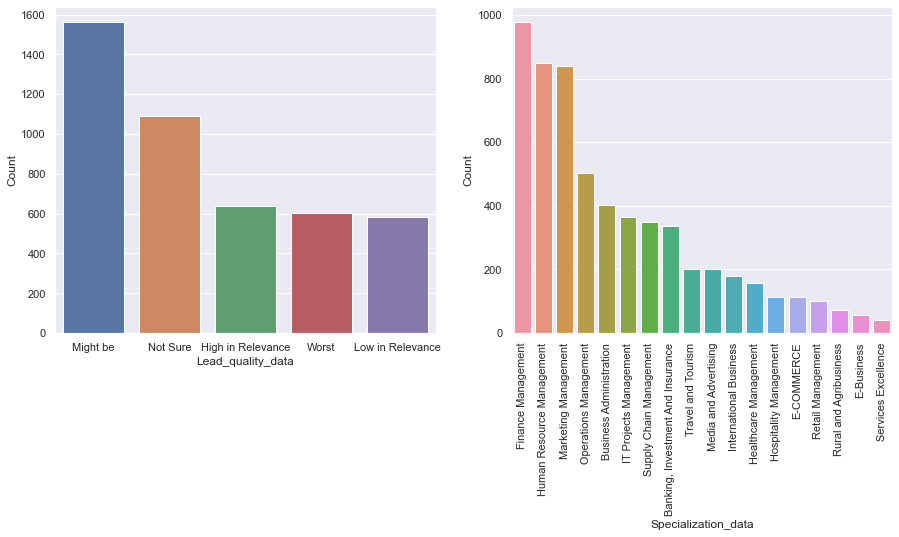

In [14]:
# Lead Quality and Specialization

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
Lead_quality_data=data['Lead Quality'].value_counts().reset_index()
Lead_quality_data.columns=['Lead_quality_data','Count']
sns.barplot(x='Lead_quality_data',y='Count',data=Lead_quality_data)

plt.subplot(1,2,2)
Specialization_data=data['Specialization'].value_counts().reset_index()
Specialization_data.columns=['Specialization_data','Count']
sns.barplot(x='Specialization_data',y='Count',data=Specialization_data)
plt.xticks(rotation=90)

plt.show()

In [15]:
data['Specialization'].isnull().sum()

3380

### The Lead Quality column has 4767 missing values replacing them with the mode will be biased , as we have a category not sure we can impute the nan values with it to keep the observations balance, As for Specialization we have 3380 missing values we can create a new category Other to replace the nan values

In [16]:
data['Lead Quality']=data['Lead Quality'].fillna('Not Sure')
data['Specialization']=data['Specialization'].fillna('Other')

In [17]:
print(data['Lead Quality'].isnull().sum())
print(data['Specialization'].isnull().sum())

0
0


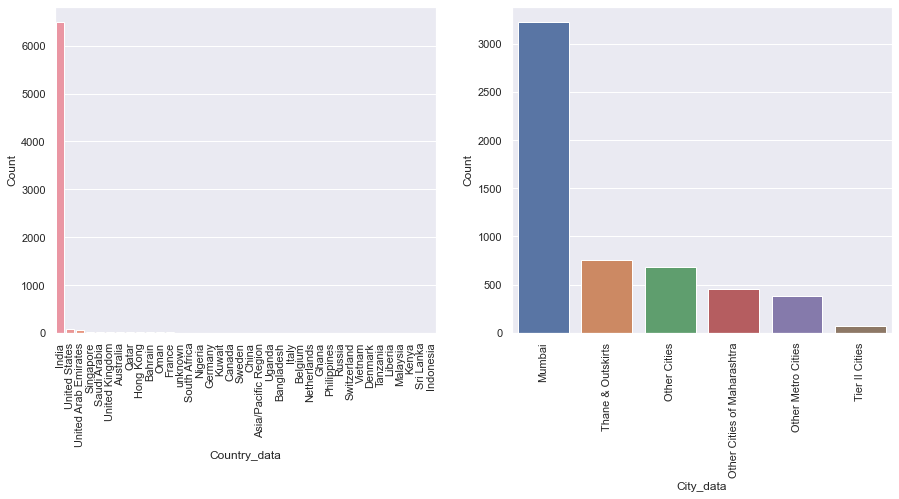

In [18]:
# Country and City

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
Country_data=data['Country'].value_counts().reset_index()
Country_data.columns=['Country_data','Count']
sns.barplot(x='Country_data',y='Count',data=Country_data)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
City_data=data['City'].value_counts().reset_index()
City_data.columns=['City_data','Count']
sns.barplot(x='City_data',y='Count',data=City_data)
plt.xticks(rotation=90)

plt.show()

In [19]:
data['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
South Africa            0.000590
Nigeria                 0.000590
Germany                 0.000590
Kuwait                  0.000590
Canada                  0.000590
Sweden                  0.000443
China                   0.000295
Asia/Pacific Region     0.000295
Uganda                  0.000295
Bangladesh              0.000295
Italy                   0.000295
Belgium                 0.000295
Netherlands             0.000295
Ghana                   0.000295
Philippines             0.000295
Russia                  0.000148
Switzerland             0.000148
Vietnam   

### The country column has a very low variance as 95% of the values are India so its better to drop the column as it will not help us in our prediction, The City column can be filled with the mode approach as the majority of the customers are from Mumbai

In [20]:
data=data.drop(['Country'],axis=1)
data['City']=data['City'].fillna('Mumbai')

In [21]:
data['City'].isnull().sum()

0

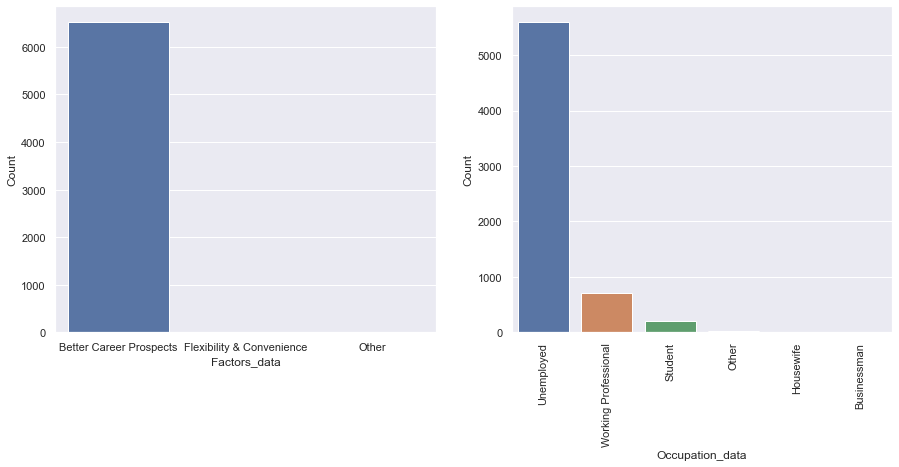

In [22]:
#What matters most to you in choosing a course & What is your current occupation

plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
Factors_data=data['What matters most to you in choosing a course'].value_counts().reset_index()
Factors_data.columns=['Factors_data','Count']
sns.barplot(x='Factors_data',y='Count',data=Factors_data)

plt.subplot(1,2,2)
Occupation_data=data['What is your current occupation'].value_counts().reset_index()
Occupation_data.columns=['Occupation_data','Count']
sns.barplot(x='Occupation_data',y='Count',data=Occupation_data)
plt.xticks(rotation=90)

plt.show()

In [23]:
data['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

### The column What matters most to you in choosing a course has 99% values filled with Better Career Prospect which again results in very low variance and will not contribute much towards ML algorithm so we need to drop this variable , The Occupation column can be filled with mode as the majority of course seekers are unemployed

In [24]:
data=data.drop(['What matters most to you in choosing a course'],axis=1)
data['What is your current occupation']=data['What is your current occupation'].fillna('Unemployed')

In [25]:
data['What is your current occupation'].isnull().sum()

0

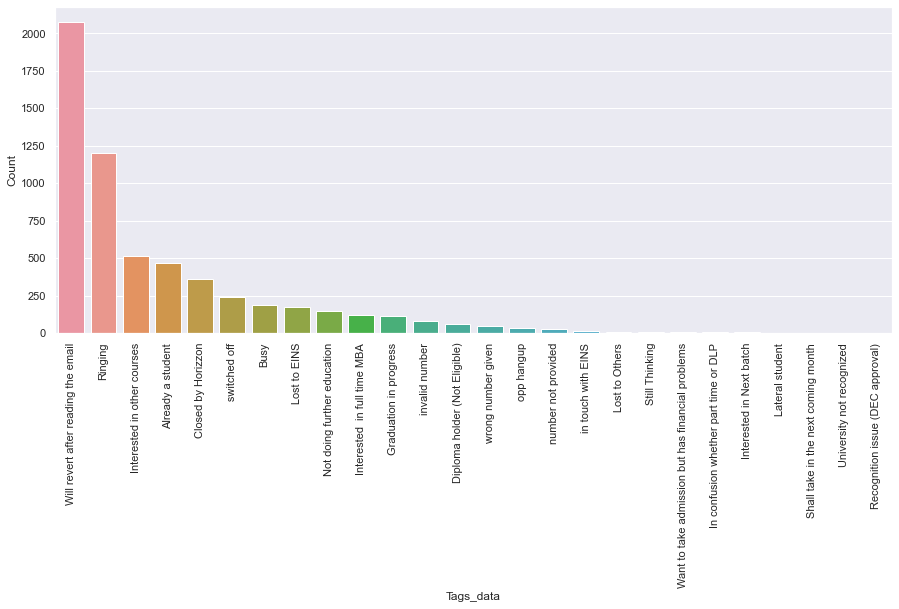

In [26]:
# Tags Column

plt.figure(figsize=(15,6))
Tags_data=data['Tags'].value_counts().reset_index()
Tags_data.columns=['Tags_data','Count']
sns.barplot(x='Tags_data',y='Count',data=Tags_data)
plt.xticks(rotation=90)
plt.show()

### This column has the data that is filled after getting the customer's response, Filling the data with mode may create biasness , we can create a new category others to fill the missing Values, Also there are various categories which can be grouped together so clubbing them together and the missing values of remaining columns is very less so we are dropping the rows to keep the as much original data as possible

In [27]:
data["Tags"]=data["Tags"].replace(["invalid number","Diploma holder (Not Eligible)","wrong number given",
                                       "opp hangup","number not provided","in touch with EINS","Lost to Others",
                                       "Still Thinking","Want to take admission but has financial problems",
                                       "In confusion whether part time or DLP","Interested in Next batch",
                                       "Lateral student","Shall take in the next coming month",
                                       "University not recognized","Recognition issue (DEC approval)",
                                       "Graduation in progress",np.nan],"OTHER_COMMENT")

In [28]:
data.dropna(inplace=True)

In [29]:
data.isnull().sum()

Lead Origin                                 0
Lead Source                                 0
Do Not Email                                0
Do Not Call                                 0
Converted                                   0
TotalVisits                                 0
Total Time Spent on Website                 0
Page Views Per Visit                        0
Last Activity                               0
Specialization                              0
What is your current occupation             0
Search                                      0
Magazine                                    0
Newspaper Article                           0
X Education Forums                          0
Newspaper                                   0
Digital Advertisement                       0
Through Recommendations                     0
Receive More Updates About Our Courses      0
Tags                                        0
Lead Quality                                0
Update me on Supply Chain Content 

### In the Machine Learning we should not pass the columns which are univariate or has low variance so checking the columns which has low Variance and dropping them

In [30]:
for i in data.select_dtypes("O").columns:
    print("#######################  \n")
    print(i)
    print("\n")
    print(data[i].value_counts())

#######################  

Lead Origin


Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64
#######################  

Lead Source


Google               2868
Direct Traffic       2543
Olark Chat           1753
Organic Search       1154
Reference             443
Welingak Website      129
Referral Sites        125
Facebook               31
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64
#######################  

Do Not Email


No     8358
Yes     716
Name: Do Not Email, dtype: int64
#######################  

Do Not Call


No     9072
Yes       2
Name: Do Not Cal

In [31]:
data=data.drop(["Do Not Call","Search",
                    "Magazine","Newspaper Article","X Education Forums","Newspaper","Digital Advertisement",
                   "Through Recommendations","Receive More Updates About Our Courses",
                   "Update me on Supply Chain Content","Get updates on DM Content","I agree to pay the amount through cheque",
                   ],axis=1)

In [32]:
data.shape

(9074, 15)

# Exploratry Data Analysis

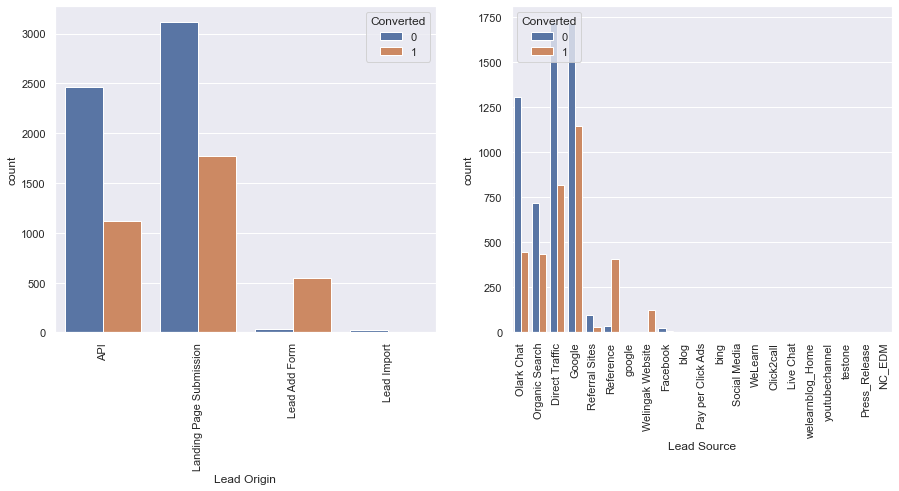

In [33]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x='Lead Origin',hue='Converted',data=data)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='Lead Source',hue='Converted',data=data)
plt.xticks(rotation=90)

plt.show()

## As we can observe here that the leads generated by landing page submission is the highest and in terms of lead source Google is the source which has contributed most towards a good convertion rate

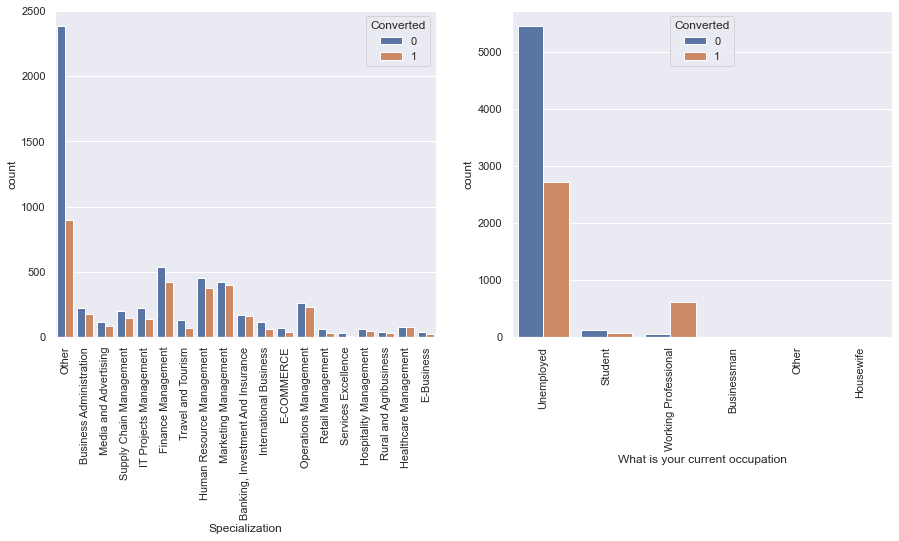

In [34]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x='Specialization',hue='Converted',data=data)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation',hue='Converted',data=data)
plt.xticks(rotation=90)

plt.show()

## The Convertion rate of the Specialization other is the highest, As we have filled the nan values here with other, Which also means that the students who bought the course were not of any domain mentioned the list. Similarly we can observe that the unemployed are buying the courses more as compared to students or working professionals

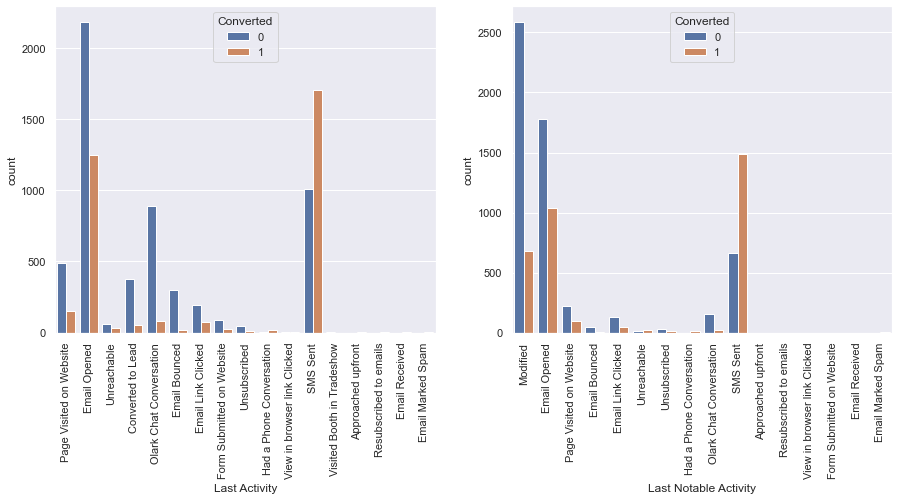

In [35]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.countplot(x='Last Activity',hue='Converted',data=data)
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(x='Last Notable Activity',hue='Converted',data=data)
plt.xticks(rotation=90)

plt.show()

## On the basis of this figure we can notice that the students who sent SMS has bought the course which makes sense as they have already did their research and it would be the last step for enrolling the course

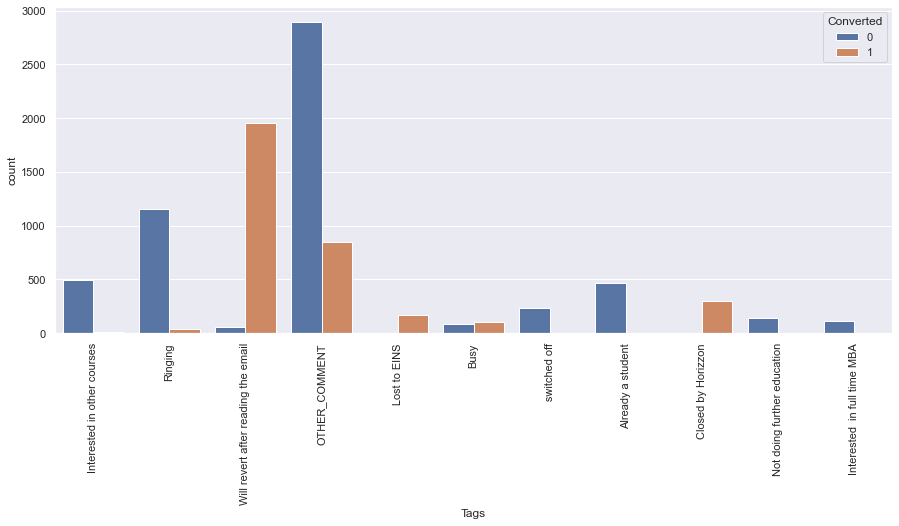

In [36]:
plt.figure(figsize=(15,6))
sns.countplot(x='Tags',hue='Converted',data=data)
plt.xticks(rotation=90)
plt.show()

## As Observed the students who has responded that they will revert after reading the email has bought the course, Althought the count of Other comments has increased but we can get the convertion rate out of it for prediction

In [37]:
data.head(2)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Other,Unemployed,Interested in other courses,Low in Relevance,Mumbai,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Other,Unemployed,Ringing,Not Sure,Mumbai,No,Email Opened


##### Converting the columns which has two categories to numbers

In [38]:
data["Do Not Email"]=data["Do Not Email"].map({"Yes":1,"No":0})
data["A free copy of Mastering The Interview"]=data["A free copy of Mastering The Interview"].map({"Yes":1,"No":0})

### For machine to understand the data we need to encode the categorical features, we are using one hot encoding here as there are multiple categories in one variable

In [39]:
data=pd.get_dummies(columns=["Lead Origin","Lead Source","Last Activity","Specialization",
                              "What is your current occupation","Tags","Lead Quality","City",
                              "Last Notable Activity"],data=data,drop_first=True)

In [40]:
data.shape

(9074, 102)

In [41]:
data.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_OTHER_COMMENT,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,1,2.0,1428,1.0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0

### There are few columns which has different units so we need to scale the data, So splitting the data into dependent and independent variable and applying min max scaling to keep positive values

In [42]:
X=data.drop(['Converted'],axis=1)
Y=data['Converted']

In [43]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [46]:
X[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]]=scaler.fit_transform(X[["TotalVisits","Total Time Spent on Website","Page Views Per Visit"]])

In [47]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_OTHER_COMMENT,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0.019920,0.296655,0.045455,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0.007968,0.674296,0.036364,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0.003984,0.134243,0.018182,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0.007968,0.628521,0.018182,

## Model Building
Let us train few models and test the accuracy scores in order to check if the predictions are correct before calculating potential probability

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

# Defining our models
models = {
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SVM': SVC()
}

# Training and evaluating our trained model
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, Y_pred)
    print(f'{name} Accuracy: {accuracy}')


RandomForest Accuracy: 0.9203084832904884
LogisticRegression Accuracy: 0.9170033051781123
SVM Accuracy: 0.9192067572530297


**************************************************************************************************************************

### As we can see that the models are performing well for classification as our dataset is cleaned well and it is not imbalanced, However our main task for this project is not classifying the convertions but to calculate the potential probability in order to provide the business with useful information about the customers so that they can invest their time in an efficient manner, In order for us to do that let us make use of recurssive feature elimination technique to select the top features which are contributing the most towards the conversion rate

***************************************************************************************************************************

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
rfe=RFE(lr,n_features_to_select=25)
rfe.fit(X,Y)
col=X.columns[rfe.support_]
print(col)

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent',
       'What is your current occupation_Working Professional', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Interested in other courses',
       'Tags_Lost to EINS', 'Tags_Not doing further education',
       'Tags_OTHER_COMMENT', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_switched off',
       'Lead Quality_Worst', 'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_SMS Sent'],
      dtype='object')


In [56]:
X_new=X[col]
lr.fit(X_new,Y)
probability_score=lr.predict_proba(X_new)[:,1]
probability_score

array([0.01618793, 0.01707166, 0.98677932, ..., 0.19460022, 0.51915782,
       0.97941927])

### Now we have our probability scores , so let us make a dataset for further calculations and assessing the optimal threshold Value with the help of ROC , AUC, Precision recall and F1 Score

In [61]:
data_new=pd.DataFrame({'Customer_ID':Y.index,'Converted':Y,'Probability_Score':probability_score})
data_new.head()

,Customer_ID,Converted,Probability_Score
0,0,0,0.016188
1,1,0,0.017072
2,2,1,0.986779
3,3,0,0.001387
4,4,1,0.952189


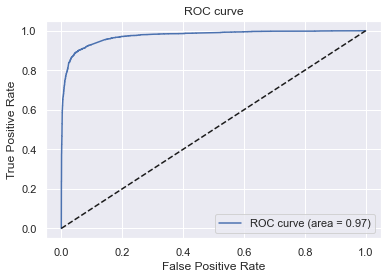

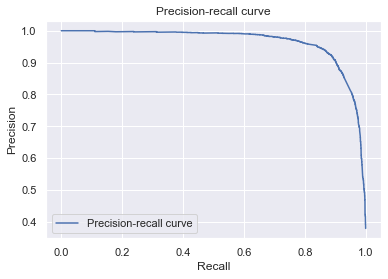

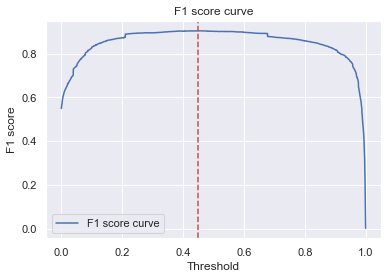

In [62]:
from sklearn.metrics import roc_curve, precision_recall_curve, f1_score, auc

fpr, tpr, thresholds_roc = roc_curve( data_new.Converted, data_new.Probability_Score)

precision, recall, thresholds_pr = precision_recall_curve( data_new.Converted, data_new.Probability_Score)

# calculating F1 score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = np.argmax(f1_scores)
optimal_threshold = thresholds_pr[optimal_idx]

# plotting ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

# plotting precision-recall curve
plt.plot(recall, precision, label='Precision-recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend(loc="lower left")
plt.show()

# plotting F1 score curve
plt.plot(thresholds_pr, f1_scores[:-1], label='F1 score curve')
plt.axvline(x=optimal_threshold, color='r', linestyle='--')
plt.xlabel('Threshold')
plt.ylabel('F1 score')
plt.title('F1 score curve')
plt.legend(loc="lower left")
plt.show()

### As observed here the area under the curve is 97% and the threshold value is approximately 0.4, So selecting the threshold value as 0.4 and dividing the students accordingly.

In [63]:
data_new["Final_prediction"]=data_new.Probability_Score.map(lambda x:1 if x>0.4 else 0)
data_new.head()

,Customer_ID,Converted,Probability_Score,Final_prediction
0,0,0,0.016188,0
1,1,0,0.017072,0
2,2,1,0.986779,1
3,3,0,0.001387,0
4,4,1,0.952189,1


In [64]:
data_new['Enquiry_quality']=data_new['Probability_Score'].apply(lambda x: 'Hot Lead' if x>=0.70 
                                                                else ('Cold Lead' if x<0.30 else 'Moderate Lead'))

data_new.head()

,Customer_ID,Converted,Probability_Score,Final_prediction,Enquiry_quality
0,0,0,0.016188,0,Cold Lead
1,1,0,0.017072,0,Cold Lead
2,2,1,0.986779,1,Hot Lead
3,3,0,0.001387,0,Cold Lead
4,4,1,0.952189,1,Hot Lead


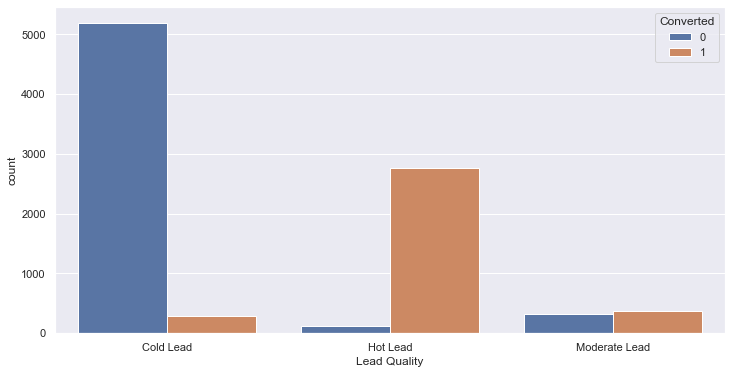

In [69]:
plt.figure(figsize=(12,6))
sns.countplot(x='Enquiry_quality',hue='Converted',data=data_new)
plt.xlabel('Lead Quality')
plt.show()

## As we can clearly see that the the students are divided on the basis of potential probability and as it makes clear sense that the convertion rate for hot leads is the highest, almost equal for moderate lead and lowest for cold leads, With this data the company can put up more focus on the hot leads and utilize their resources efficiently in order to increase the sales whereas find ways to get the cold and moderate leads converted even more

## Thank you